<a href="https://colab.research.google.com/github/GuillaumeArp/Wild_Notebooks/blob/main/Linear_regression_2_Multivariate_Guillaume_Arp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [ ]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [ ]:
# Complete x, y and z in the script below:
fig = px.scatter_3d(x = 'MAX_TEMPERATURE_C', 
              y = 'MIN_TEMPERATURE_C', 
              z= 'SUNHOUR', 
              data_frame=df_weather,
              template='plotly_dark',
              color='SUNHOUR')

fig.update_layout(width=1000, height=700)
fig.show()


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a cew column 'predict'.**

In [ ]:
# Your code here :
X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

modelLR = LinearRegression().fit(X, y)

df_weather['PREDICT'] = modelLR.predict(X)
df_weather.head()


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,PREDICT
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1,8.980922
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2,12.353602
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3,7.410233
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4,4.037552
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5,6.421559


In [ ]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
df_weather.dtypes

DATE                      datetime64[ns]
MAX_TEMPERATURE_C                  int64
MIN_TEMPERATURE_C                  int64
WINDSPEED_MAX_KMH                  int64
TEMPERATURE_MORNING_C              int64
TEMPERATURE_NOON_C                 int64
TEMPERATURE_EVENING_C              int64
PRECIP_TOTAL_DAY_MM              float64
HUMIDITY_MAX_PERCENT               int64
VISIBILITY_AVG_KM                float64
PRESSURE_MAX_MB                    int64
CLOUDCOVER_AVG_PERCENT           float64
HEATINDEX_MAX_C                    int64
DEWPOINT_MAX_C                     int64
WINDTEMP_MAX_C                     int64
WEATHER_CODE_MORNING               int64
WEATHER_CODE_NOON                  int64
WEATHER_CODE_EVENING               int64
TOTAL_SNOW_MM                      int64
UV_INDEX                           int64
SUNHOUR                          float64
OPINION                           object
MONTH                              int64
DAY                                int64
PREDICT         

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [ ]:
# Your code here :

fig = px.scatter_3d(
    data_frame=df_weather,
    x='PREDICT',
    y='MIN_TEMPERATURE_C',
    z='SUNHOUR',
    template='plotly_dark',
    color='SUNHOUR',
    labels={
        'SUNHOUR': 'Sun Hours',
        'PREDICT': 'Predicted Max Temp',
        'MIN_TEMPERATURE_C': 'Min Temp'
    },
    title='Predicted Maximum Temperature Based on Sun Hours and Minimum Temperature')

fig.update_layout(width=1000, height=700)
fig.show()



**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : 
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

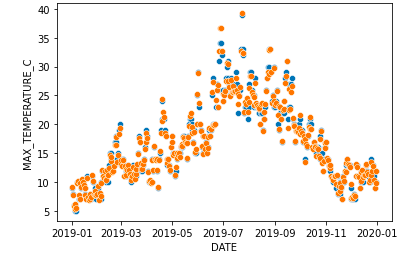

In [ ]:
# Your code here :

X = df_weather[['MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',	'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C',
                'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
                'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C',
                'WINDTEMP_MAX_C','WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON',
                'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

modelLR = LinearRegression().fit(X, y)

df_weather['PREDICT_2'] = modelLR.predict(X)
df_weather.head()


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,PREDICT,PREDICT_2
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1,8.980922,9.098345
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2,12.353602,7.739923
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3,7.410233,5.869554
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4,4.037552,5.354696
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5,6.421559,6.112450


In [ ]:
# Fancy plot with Plotly

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df_weather.DATE, y=df_weather.MAX_TEMPERATURE_C, name='Max Temp', mode='markers', opacity=0.7)
)

fig.add_trace(
    go.Scatter(x=df_weather.DATE, y=df_weather.PREDICT_2, name='Predicted Temp', mode='markers', opacity=0.7)
)

fig.update_layout(width=800,
                  height=480, 
                  template='plotly_dark', 
                  title='Max Recorded Temperature vs Predicted Temperature', 
                  margin=dict(b=20, l=20, t=50, r=20),
                  xaxis_title='DATE',
                  yaxis_title='Temperatures')
fig.show()

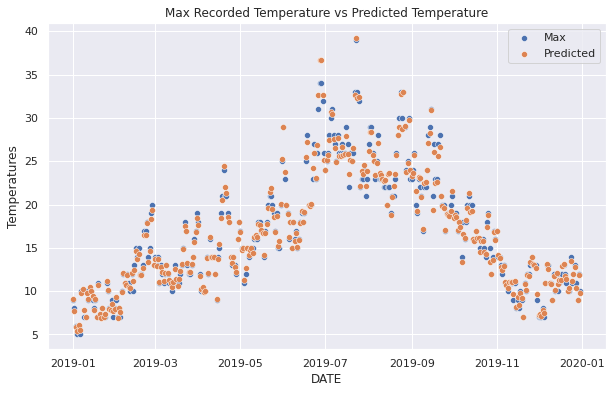

In [ ]:
# Less fancy but looks more like the example with Seaborn

sns.set_theme()

ax = plt.figure(figsize=(10,6))

ax_1 = sns.scatterplot(
    data=df_weather,
    x = 'DATE',
    y = 'MAX_TEMPERATURE_C',
    label='Max')
ax_2 = sns.scatterplot(
    data=df_weather,
    x = 'DATE',
    y = 'PREDICT_2',
    label='Predicted')

ax = plt.title("Max Recorded Temperature vs Predicted Temperature")
ax = plt.legend()
ax = plt.xlabel('DATE')
ax = plt.ylabel('Temperatures')

plt.show()


You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [ ]:
# Your code here :

for i, j in zip(X.columns, modelLR.coef_):
  print(i,j)

MIN_TEMPERATURE_C 0.057431841136780355
WINDSPEED_MAX_KMH -0.0024352877555795516
TEMPERATURE_MORNING_C -0.08268374414565023
TEMPERATURE_NOON_C 0.18816823718726228
TEMPERATURE_EVENING_C 0.17719153160059536
PRECIP_TOTAL_DAY_MM 0.005210499159367913
HUMIDITY_MAX_PERCENT -0.0027953224455116517
VISIBILITY_AVG_KM 0.008433573684342862
PRESSURE_MAX_MB -0.0018879020321532567
CLOUDCOVER_AVG_PERCENT -0.0063315182950594885
HEATINDEX_MAX_C 0.5830201683414974
DEWPOINT_MAX_C -0.03643234651173282
WINDTEMP_MAX_C 0.0579203396447976
WEATHER_CODE_MORNING 0.0005218133943660361
WEATHER_CODE_NOON 4.0832612770429726e-05
WEATHER_CODE_EVENING -0.0002745298715272983
TOTAL_SNOW_MM -1.708702623837155e-16
UV_INDEX -0.02890127384049317
SUNHOUR -0.022570133780463505


In [ ]:
print(f"The biggest coefficient is {X.columns[np.argmax(modelLR.coef_)]} with {np.max(modelLR.coef_)}")

The biggest coefficient is HEATINDEX_MAX_C with 0.5830201683414974
